In [2]:
#!pip install tensorflow opencv-python matplotlib

In [3]:
#!pip install keras

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam

2023-05-01 14:41:50.534321: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-01 14:41:51.310324: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-01 14:41:51.473153: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-01 14:41:51.473196: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

# Preprocessing

In [5]:
train_df = pd.read_csv(r'fashion-mnist_train.csv')
test_df = pd.read_csv(r'fashion-mnist_test.csv')


In [6]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train_df.shape

(60000, 785)

In [8]:
test_df.shape

(10000, 785)

In [9]:
#check nulls
print(train_df.isnull().any())

label       False
pixel1      False
pixel2      False
pixel3      False
pixel4      False
            ...  
pixel780    False
pixel781    False
pixel782    False
pixel783    False
pixel784    False
Length: 785, dtype: bool


In [10]:
# split data into x (image) and y (label) arrays 
train_data = np.array(train_df, dtype='float32')
test_data = np.array(test_df, dtype='float32')

x_train = train_data[:, 1:] / 255 #rescale from 255 to 1 for better convergence
y_train = train_data[:, 0]

x_test = test_data[:, 1:] / 255 #normalize 
y_test = test_data[:, 0]

In [11]:
# split the training set into validation and validate arrays
# idea: compare with diff test size 
x_train, x_validate, y_train, y_validate = train_test_split(
    x_train, y_train, test_size=0.2, random_state=12345,
)

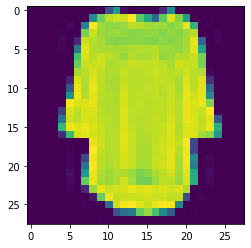

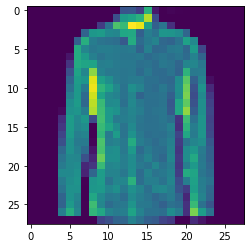

In [12]:
# images

image = x_train[200, :].reshape((28, 28))

plt.imshow(image)
plt.show()

image = x_train[400, :].reshape((28, 28))

plt.imshow(image)
plt.show()

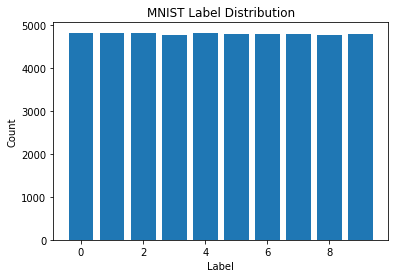

In [13]:
#Distribution of classes and labels

counts, bins = np.histogram(y_train, bins=10, range=(0,10))
fig, ax = plt.subplots()
ax.bar(bins[:-1], counts, width=0.8)
ax.set_xlabel('Label')
ax.set_ylabel('Count')
ax.set_title('MNIST Label Distribution')
plt.show()

# Building the model

In [14]:
#define the model 
im_rows = 28
im_cols = 28 
batch_size = 512
im_shape = (im_rows, im_cols, 1) #2 dimensional 
num_classes = 10

x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_validate = x_validate.reshape(x_validate.shape[0], *im_shape)

print(x_train.shape)
print(x_test.shape)
print(x_validate.shape)

model = Sequential()
model.add (Conv2D(filters=32,kernel_size =3, activation = 'relu',input_shape = im_shape))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])




(48000, 28, 28, 1)
(10000, 28, 28, 1)
(12000, 28, 28, 1)


2023-05-01 14:42:05.831570: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-05-01 14:42:05.833058: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-01 14:42:05.833886: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-4TLGGRRF): /proc/driver/nvidia/version does not exist
2023-05-01 14:42:05.837521: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
#train model
history = model.fit(x_train,y_train,batch_size= batch_size,epochs= 20,verbose = 1,validation_data= (x_validate,y_validate))

Epoch 1/20
94/94 [==============================] - 8s 74ms/step - loss: 0.7781 - accuracy: 0.7428 - val_loss: 0.4922 - val_accuracy: 0.8282
Epoch 2/20
94/94 [==============================] - 7s 70ms/step - loss: 0.4492 - accuracy: 0.8434 - val_loss: 0.4030 - val_accuracy: 0.8598
Epoch 3/20
94/94 [==============================] - 7s 70ms/step - loss: 0.3996 - accuracy: 0.8601 - val_loss: 0.3694 - val_accuracy: 0.8713
Epoch 4/20
94/94 [==============================] - 7s 73ms/step - loss: 0.3676 - accuracy: 0.8710 - val_loss: 0.3411 - val_accuracy: 0.8812
Epoch 5/20
94/94 [==============================] - 7s 77ms/step - loss: 0.3492 - accuracy: 0.8767 - val_loss: 0.3299 - val_accuracy: 0.8849
Epoch 6/20
94/94 [==============================] - 7s 71ms/step - loss: 0.3309 - accuracy: 0.8831 - val_loss: 0.3206 - val_accuracy: 0.8878
Epoch 7/20
94/94 [==============================] - 7s 74ms/step - loss: 0.3181 - accuracy: 0.8890 - val_loss: 0.3026 - val_accuracy: 0.8943
Epoch 8/20
94

# Evaluate Performance

In [16]:
score = model.evaluate(x_validate, y_validate, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.24796278774738312
Test accuracy: 0.9120833277702332


In [17]:
history.history

{'loss': [0.7781240940093994,
  0.4491986632347107,
  0.39960506558418274,
  0.3675804138183594,
  0.3491881191730499,
  0.3309420049190521,
  0.31806379556655884,
  0.306963711977005,
  0.2981448471546173,
  0.2889227271080017,
  0.28157222270965576,
  0.27820950746536255,
  0.2684709131717682,
  0.266767680644989,
  0.26133039593696594,
  0.25479742884635925,
  0.25127217173576355,
  0.24718692898750305,
  0.23776428401470184,
  0.23532161116600037],
 'accuracy': [0.7427708506584167,
  0.843375027179718,
  0.8600833415985107,
  0.8709791898727417,
  0.8767499923706055,
  0.8830833435058594,
  0.8889583349227905,
  0.8920833468437195,
  0.8941041827201843,
  0.8971874713897705,
  0.9001250267028809,
  0.9015833139419556,
  0.9045833349227905,
  0.9047291874885559,
  0.9068124890327454,
  0.9102083444595337,
  0.9091249704360962,
  0.9113125205039978,
  0.9150000214576721,
  0.9160833358764648],
 'val_loss': [0.492244154214859,
  0.40304577350616455,
  0.36943960189819336,
  0.34112396

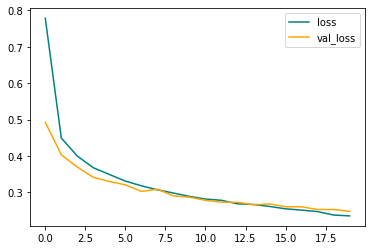

In [18]:
#loss plot
fig = plt.figure()
plt.plot(history.history['loss'],color = 'teal',label = 'loss')
plt.plot(history.history['val_loss'],color = 'orange',label = 'val_loss')
plt.legend(loc='upper right')
plt.show()